In [44]:
import pandas as pd
from models import *
from keras.utils import to_categorical
from sklearn.metrics import brier_score_loss
from IPython.display import SVG


def encodePhred(x):
    out = -10 * np.log10(1.00000000001-x)
    out = out.astype(np.int64)
    out[out > 60] = 60
    out[out <= 0] = 1
    return out

In [1]:
def bow_model2():
    input_layer = 263
    output_layer = 2 

    h_layer1 = 512
    dropout1 = 0.25

    h_layer2 = 256
    dropout2 = 0.5

    h_layer3 = 128
    dropout3 = 0.5

    model = Sequential()

    model.add(Dense(h_layer1, activation='relu', input_shape=(input_layer, )))
    model.add(BatchNormalization())
    model.add(Dropout(dropout1))

    model.add(Dense(h_layer2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout2))
    
    model.add(Dense(h_layer3, activation='relu', ))
    model.add(BatchNormalization())

    model.add(Dense(output_layer, activation='softmax'))

    return model

In [3]:
train_df = pd.read_csv("sims/train_gamcompare/csv/compared_mapped100_sim100..csv")

In [4]:
train_df

,correct,mq,score,secondary_score,secondary_score_size,identity,aligner,read,mqp,AAAA,...,GCTT,TCTT,AGTT,CGTT,GGTT,TGTT,ATTT,CTTT,GTTT,TTTT
0,1,60,105,105,0,0.99,orig,0be4778ad366b541,0.999999,1,...,0,1,1,0,0,1,0,2,1,1
1,1,60,105,105,7,0.99,orig,7638be6dd4f431e9,0.999999,5,...,1,0,2,0,0,0,0,0,0,0
2,1,60,105,105,0,0.99,orig,aaeea62daae4a15c,0.999999,12,...,0,0,0,0,0,0,1,0,0,1
3,1,60,105,105,0,0.99,orig,10d9f32edb5b3d49,0.999999,3,...,1,1,0,0,0,0,0,0,0,0
4,1,60,100,100,4,0.98,orig,1e85a9c9c73fbd1a,0.999999,0,...,0,0,1,0,1,0,1,0,0,1
5,1,60,105,105,0,0.99,orig,fd365bfe1b0ac65e,0.999999,0,...,0,1,2,0,0,0,1,1,2,2
6,1,60,105,105,0,0.99,orig,786b040f121b8701,0.999999,1,...,0,2,0,0,3,0,2,2,1,1
7,1,60,100,100,0,0.98,orig,e77ce18cfc353b42,0.999999,1,...,0,1,0,0,0,0,0,0,0,0
8,1,60,105,105,0,0.99,orig,f116bcbbae26a737,0.999999,2,...,0,2,0,0,1,0,0,1,1,0
9,1,60,105,105,0,0.99,orig,0c3e4bdfaa050344,0.999999,1,...,0,1,0,0,0,1,0,0,0,0


In [5]:
y = to_categorical(train_df['correct'], 2)

In [6]:
X = train_df.drop(columns=['correct', 'read', 'aligner'])

In [7]:
X.shape

(1000000, 262)

In [8]:
model = bow_model2()

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               134656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
__________

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [57]:
model.fit(X, y, batch_size=128, epochs=1, verbose=1, shuffle=True)

Epoch 1/1
1000000/1000000 [==============================] - 569s 569us/step - loss: 0.0185 - acc: 0.9976


In [12]:
test_df = pd.read_csv("sims/test_gamcompare/csv/tcompared_tmapped100_tsim100..csv")

In [ ]:
y_train_pred = model.predict(X)

In [ ]:
brier_score_loss(train_df['correct'].values, y_train_pred[:, 1])

In [ ]:
brier_score_loss(train_df['correct'].values, train_df['mqp'].values)

In [20]:
X_test = test_df.drop(columns=['correct', 'read', 'aligner'])

In [21]:
y_test_pred = model.predict(X_test)

In [22]:
brier_score_loss(test_df['correct'].values, y_test_pred[:, 1])

0.00172863220099502

In [23]:
def output_tsv(df, pred):
    out_df = df.loc[:, ['correct', 'mq', 'aligner', 'read']]
    recal_df =  out_df.copy()
    recal_df.loc[:, 'aligner'] = 'recal'
    recal_df.loc[:, 'mq'] = pred
    
    return out_df.append(recal_df, ignore_index=True)

In [45]:
test_tsv = output_tsv(test_df, encodePhred(y_test_pred[:, 1]))

/public/home/jchan67/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


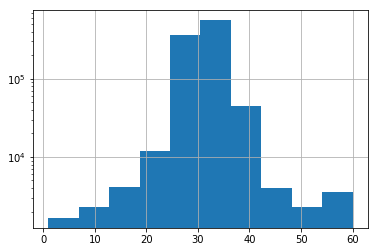

In [55]:
test_tsv[test_tsv.aligner == "recal"].mq.hist(log=True)

In [47]:
test_tsv.to_csv("bow_test.tsv", index=False, sep='\t')

In [48]:
!Rscript ~/vg/scripts/plot-qq.R bow_test.tsv bow_test.svg

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: ggrepel
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning messages:
1: Removed 49 rows containing non-finite values (stat_smooth). 
2: Removed 49 rows containing missing values (geom_point). 


In [49]:
!Rscript ~/vg/scripts/plot-roc.R bow_test.tsv roc-bow_test.svg

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: ggrepel
Loading required package: scales

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor

Warning messages:
1: Transformation introduced infinite values in continuous x-axis 
2: Transformation introduced infinite values in continuous x-axis 
3: Transformation introduced infinite values in continuous x-axis 


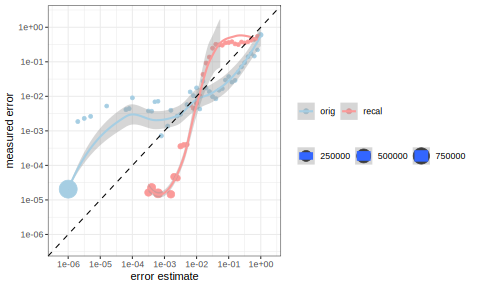

In [50]:
SVG("bow_test.svg")

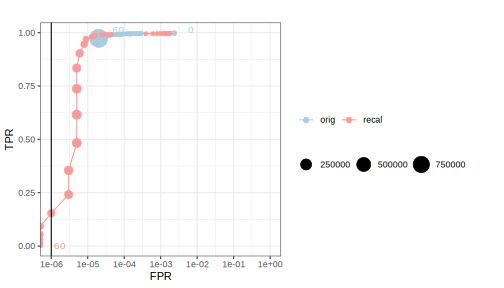

In [51]:
SVG("roc-bow_test.svg")